In [1]:
import numpy as np
np.random.seed(0)
import matplotlib.pyplot as plt
%matplotlib inline
import gc
gc.collect()

4

In [14]:
# p202 西瓜数据集4.0
X=np.array([[0.697,0.460],[0.774,0.376],[0.634,0.264],[0.608,0.318],[0.556,0.215],
                [0.403,0.237],[0.481,0.149],[0.437,0.211],[0.666,0.091],[0.243,0.267],
                [0.245,0.057],[0.343,0.099],[0.639,0.161],[0.657,0.198],[0.360,0.370],
                [0.593,0.042],[0.719,0.103],[0.359,0.188],[0.339,0.241],[0.282,0.257],
                [0.748,0.232],[0.714,0.346],[0.483,0.312],[0.478,0.437],[0.525,0.369],
                [0.751,0.489],[0.532,0.472],[0.473,0.376],[0.725,0.445],[0.446,0.459]])

y = np.array([0] * 8 + [1] * 13 + [0] * 9)

In [21]:
class LVQ:
    def __init__(self, q, eta, maxiter):
        self.q = q
        self.eta = eta
        self.maxiter = maxiter
        self.p = None
        self.t = None
    
    def fit(self, X, y):
        n_samples = X.shape[0]
        y_unique = np.sort(np.unique(y))
        
        assert self.q <= len(y_unique)
        
        #图9.4
        p = []
        t = []
        for i in range(self.q): #line 1
            indices = np.where(y==i)[0]
            p.append(X[indices[0]])
            t.append(i)
            
        self.t = t
        
        for _ in range(self.maxiter):
            index = int(np.random.random() * len(y))
            sample = X[index] #line 3
            
            d = []
            for i in range(self.q):
                dji = np.sqrt(np.sum(np.square(sample - p[i]))) # line 4
                d.append(dji)
            
            i_star = np.argmin(d) # line 5
            t_star = t[i_star]
            
            if y[index] == t_star: # line 6-10
                p[i_star] = p[i_star] + self.eta * (sample - p[i_star])
            else:
                p[i_star] = p[i_star] - self.eta * (sample - p[i_star])
                
        self.p = p

    def predict(self, X):
        n_samples = X.shape[0]
        y_hat = []
        for _ in range(n_samples):
            d = []
            for i in range(self.q):
                dji = np.sqrt(np.sum(np.square(X[_] - self.p[i]))) # line 4
                d.append(dji)

            i_star = np.argmin(d) # line 5
            t_star = self.t[i_star]
            y_hat.append(t_star)
        return y_hat
        
        
        

                
lvq = LVQ(2, 0.1, 200)
lvq.fit(X, y)
y_hat = lvq.predict(X)
print(y_hat)

        

[0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


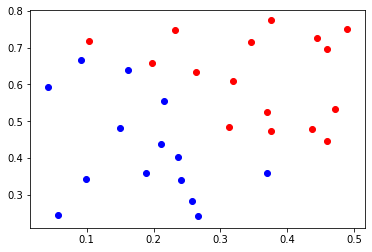

In [23]:
colors = ['r', 'b', 'y']
for i in range(len(X)):
    plt.scatter(X[i][1], X[i][0], c=colors[y_hat[i]])
    